In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
import joblib

In [ ]:
# --- 1. Load the Landmark Data ---
data = pd.read_csv('/content/drive/MyDrive/hand_landmarks.csv')
# Convert the 'label' column to string type to handle mixed data types
data['label'] = data['label'].astype(str)
# define X and y
X = data.drop('label', axis=1)
y = data['label']

/tmp/ipython-input-1557246229.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/hand_landmarks.csv')


In [ ]:
# Preprocess Features (Normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert string labels (like 'A', '1') into numbers
encode = LabelEncoder()
y_encoded = encode.fit_transform(y)



In [ ]:
# Convert integer labels into one-hot encoded vectors
y_categorical = to_categorical(y_encoded)

# Get the number of classes for the final layer of our DNN
num_classes = y_categorical.shape[1]



In [ ]:
# Split into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)




In [ ]:
#Build the DNN Architecture ---
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3)) # Dropout helps prevent overfitting
model.add(Dense(64, activation='relu'))# Hidden layer
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))# Hidden layer
model.add(Dense(num_classes, activation='softmax'))# Output layer


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,858 (73.66 KB)

 Trainable params: 18,858 (73.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )


In [ ]:
tbCallBack =callbacks.TensorBoard(log_dir = "tbGraph/")

In [ ]:
# Train the Model
sign = model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test, y_test),callbacks = [tbCallBack])



Epoch 1/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8066 - loss: 0.7055 - val_accuracy: 0.9980 - val_loss: 0.0161
Epoch 2/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9953 - loss: 0.0228 - val_accuracy: 0.9980 - val_loss: 0.0165
Epoch 3/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9976 - loss: 0.0108 - val_accuracy: 0.9988 - val_loss: 0.0119
Epoch 4/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 0.9988 - val_loss: 0.0171
Epoch 5/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9988 - val_loss: 0.0158
Epoch 6/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0039 - val_accuracy: 0.9988 - val_loss: 0.0133
Epoch 7/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9984 - val_loss: 0.0132
Epoch 8/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9991 - loss: 0.0047 - val_accu

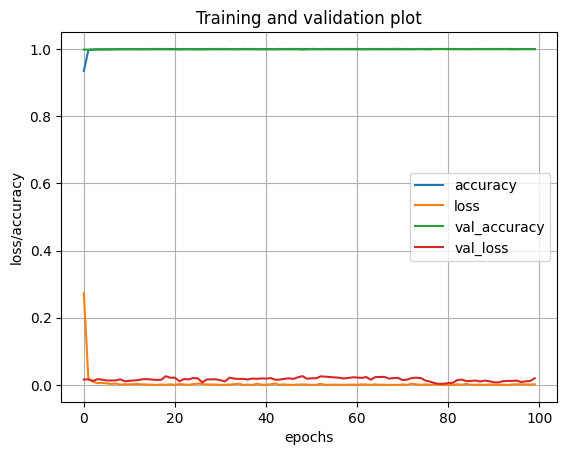

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(sign.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [ ]:
# Print the final evaluation metrics
print("\nEvaluating model on test data:")
loss, accuracy = model.evaluate(X_test, y_test)



Evaluating model on test data:
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9986 - loss: 0.0264


In [ ]:
print(f"Test Loss: {loss:.4f}")


Test Loss: 0.0200


In [ ]:
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 99.92%


 Test acccuracy is greater than 95% so we can use this model

In [ ]:
# Save the trained model
model.save('sign_language_model.h5')
print("Model saved as 'sign_language_model.h5'")

Model saved as 'sign_language_model.h5'


In [ ]:
# --- CRITICAL: Save the Scaler and Encoder ---
# We need these two files for the real-time webcam part
# We must use the *same* scaler and encoder on the live data
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')
print("Scaler saved as 'scaler.joblib'")
print("Encoder saved as 'encoder.joblib'")

Scaler saved as 'scaler.joblib'
Encoder saved as 'encoder.joblib'
